In [1]:
import os
import math
import time
import random
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

df = pd.read_csv(r'C:/Users/Gongn1ng/Desktop/heartbeat.csv')#读入用作训练的数据
test = pd.read_csv(r'C:/Users/Gongn1ng/Desktop/testA.csv')#读入测验数据
df

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
...,...,...,...
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0


In [2]:
test

,id,heartbeat_signals
0,100000,"0.9915713654170097,1.0,0.6318163407681274,0.13..."
1,100001,"0.6075533139615096,0.5417083883163654,0.340694..."
2,100002,"0.9752726292239277,0.6710965234906665,0.686758..."
3,100003,"0.9956348033996116,0.9170249621481004,0.521096..."
4,100004,"1.0,0.8879490481178918,0.745564725322326,0.531..."
...,...,...
19995,119995,"1.0,0.8330283177934747,0.6340472606311671,0.63..."
19996,119996,"1.0,0.8259705825857048,0.4521053488322387,0.08..."
19997,119997,"0.951744840752379,0.9162611283848351,0.6675251..."
19998,119998,"0.9276692903808186,0.6771898159607004,0.242906..."


In [3]:
df_list = []#训练集的分特征割
for items in df.values:
    df_list.append([items[0]] + [float(i) for i in items[1].split(',')] + [items[2]])
df = pd.DataFrame(np.array(df_list))
df.columns = ['id'] + ['v_' + str(i) for i in range(len(df_list[0])-2)] + ['label']

df1 = df.drop(['id','label'],axis = 1,inplace = False)#将训练集中的id和label字段删除
X_train,X_test,y_train,y_test = train_test_split(df1,df['label'],random_state = 0)#分割训练时用的训练和测试集

test_list = []#测试集的特征分割
for items in test.values:
    test_list.append([items[0]] + [float(i) for i in items[1].split(',')] )
test = pd.DataFrame(np.array(test_list))

test.columns = ['id'] + ['v_' + str(i) for i in range(len(test_list[0])-1)] 
test1 = test.drop(['id'],axis = 1,inplace = False)#将测试集中的id字段删除
df

,id,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,...,v_196,v_197,v_198,v_199,v_200,v_201,v_202,v_203,v_204,label
0,0.0,0.991230,0.943533,0.764677,0.618571,0.379632,0.190822,0.040237,0.025995,0.031709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.971482,0.928969,0.572933,0.178457,0.122962,0.132360,0.094392,0.089575,0.030481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.000000,0.959149,0.701378,0.231778,0.000000,0.080698,0.128376,0.187448,0.280826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3.0,0.975795,0.934088,0.659637,0.249921,0.237116,0.281445,0.249921,0.249921,0.241397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.000000,0.055816,0.261294,0.359847,0.433143,0.453698,0.499004,0.542796,0.616904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,1.000000,0.677705,0.222392,0.257158,0.204690,0.054665,0.026152,0.118181,0.244838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,99996.0,0.926857,0.906347,0.636993,0.415038,0.374745,0.382581,0.358943,0.341359,0.336525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
99997,99997.0,0.925835,0.587384,0.633226,0.632353,0.639283,0.614292,0.599155,0.517632,0.403803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
99998,99998.0,1.000000,0.994762,0.829702,0.458193,0.264162,0.240228,0.213766,0.189291,0.203816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


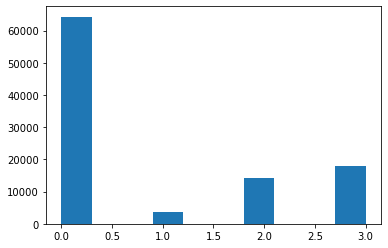

In [4]:
plt.hist(df['label'])#对label的数量进行数据可视化
plt.show() 

In [5]:
for alpha in [0.0001,0.001,0.01,0.1,1]:#做循环并使用交叉验证寻找最好的参数
    mlp = MLPClassifier(max_iter = 2000,alpha = alpha, random_state = 0)
    kfold = KFold(n_splits = 5)
    scores = (cross_val_score(mlp,X_train,y_train,cv = kfold))
    print("平均分数为：\n{:.3f}".format(scores.mean()))

平均分数为：
0.979
平均分数为：
0.979
平均分数为：
0.979
平均分数为：
0.970
平均分数为：
0.927


In [6]:
#在上一框的结果中知道0.01是最佳的参数
mlp = MLPClassifier(max_iter = 2000,alpha = 0.01, random_state = 0)#填入最佳的alpha后对模型进行训练
mlp.fit(X_train,y_train)
print("测试集分数:{:.2f}".format(mlp.score(X_test,y_test)))

测试集分数:0.98


In [7]:
submit = pd.read_csv('C:/Users/Gongn1ng/Desktop/sample_submit.csv')#读入预测结果的文档
preds = mlp.predict(test1)#预测测试集的结果
submit['label'] = preds#将预测结果写入预测结果文档
submit.to_csv('C:/Users/Gongn1ng/Desktop/sample_result.csv', index=False)#创建写入了label行的预测结果的文档